# Data Loading

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('CSV/Housing-2.csv')

In [54]:
df.drop(columns=['id', 'date'], inplace=True)

# Model Splitting

In [55]:
from sklearn.model_selection import train_test_split as split

In [56]:
train_x, test_x, train_y, test_y = split(df.drop(columns=['price']), df['price'], test_size=0.2)

# Model Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Model Building

In [60]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=18))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/python/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [63]:
callback = EarlyStopping (
    monitor="val_loss",
    min_delta=5,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=5,
)

# Batch, Stochastic, Mini-Batch Gradient descent

In [64]:
# without Using Gradient Descent
history = model.fit(train_x, train_y, validation_split=0.1, epochs=100, callbacks=callback)

# Batch Gradient Descent
# history = model.fit(train_x, train_y, validation_split=0.1, batch_size=len(train_x) epochs=100)

#stochastic Gradient Descent
# history = model.fit(train_x, train_y, validation_split=0.1, batch_size=1 epochs=100)

# Mini Batch Gradient Descent
# history = model.fit(train_x, train_y, validation_split=0.1, batch_size=2^n epochs=100)

Epoch 1/100


487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 299377688576.0000 - val_loss: 40845008896.0000
Epoch 2/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 36948848640.0000 - val_loss: 36322209792.0000
Epoch 3/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35440869376.0000 - val_loss: 33308248064.0000
Epoch 4/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32997066752.0000 - val_loss: 31171940352.0000
Epoch 5/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30960869376.0000 - val_loss: 32134111232.0000
Epoch 6/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30437111808.0000 - val_loss: 29182140416.0000
Epoch 7/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30269626368.0000 - val_loss: 28318613504.0000
Epoch 8/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27488708608.0000 - val_loss: 28016240640.0000
Epoch 9/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 29440727040.0000 - val_loss: 26131609600.0000
Epoch 10/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms

# Model Prediction

In [65]:
predict = model.predict(test_x)

  1/136 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Model Evaluation

In [66]:
from sklearn.metrics import r2_score as score

In [67]:
score(test_y, predict)

0.8951915600208653

# Evaluation Visualisation

In [68]:
import matplotlib.pyplot as plt

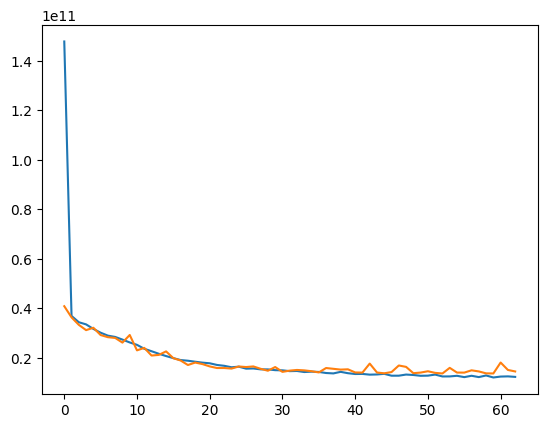

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])